# Time Series K-Means (Un-Supervised Clustering)
## Data from 00_120d_CEEMDAN.ipynb
#### /financial_forecasting_analysis/notebooks/00_Decomposition_4_Clustering/00_120d_CEEMDAN.ipynb

In [1]:
!pip install pandas=='1.3.4'

In [2]:
import pandas as pd
import numpy as np
import scipy
import sklearn

In [3]:
import pickle

In [4]:
!python -m pip install tslearn

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [1]:
import sys, os
absolutepath = os.path.abspath('')
fileDirectory = os.path.dirname(absolutepath)

#Path of parent directory (moves outside of repository)
parentDirectory = os.path.dirname(fileDirectory)

In [6]:
#decomposed_df_no_null = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/decomposed_df_no_null.csv')
decomposed_df_no_null = pd.read_csv(parentDirectory + '/data/decomposed_df_no_null.csv')

In [5]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from tslearn.metrics import dtw_path


/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [9]:
ticker_order = list(decomposed_df_no_null.ticker.dropna().unique())
print(f"# of tickers = {len(ticker_order)}") # this should be 500 but is 497

# this list will be transformed
ts_data = []
for t in ticker_order:
    # shape is (118, 18)
    # converting numpy to list for tslearn
    ts_data.append(decomposed_df_no_null[decomposed_df_no_null.ticker ==t].iloc[:,2:].to_numpy())

# of tickers = 497


In [10]:
ts_X = to_time_series_dataset(ts_data) 

In [11]:
ts_X

array([[[ 5.09451530e-02, -6.30879268e-02, -1.04740784e-02, ...,
          3.25866958e-02, -5.22762463e-02, -1.38278132e-02],
        [ 4.63887243e-03, -6.95111349e-02, -1.67083244e-02, ...,
         -3.81475715e-02, -5.38284474e-02, -1.98759069e-02],
        [-4.30708526e-02, -7.91107740e-02, -2.18891567e-02, ...,
         -2.51172508e-02, -6.46049573e-02, -2.45355135e-02],
        ...,
        [ 8.85309168e-03,  6.14612040e-02,  2.30091497e-02, ...,
          3.77345708e-02,  4.95598864e-02,  4.67655121e-02],
        [ 7.65364677e-02,  5.20922474e-02,  2.38995600e-02, ...,
          7.40329682e-02,  3.82848630e-02,  4.45032853e-02],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 5.78188928e-02,  5.02389545e-02, -7.63659064e-02, ...,
          4.13172304e-02,  4.56327999e-02,  1.59668360e-02],
        [-1.54256966e-03,  5.00559567e-02, -8.78232057e-02, ...,
         -4.03737970e-02,  4.15399602e

In [29]:
#distortions = [] # this is for no-time
inertias = []
K = range(6, 25)
seed = 0
for k in K:
    # Building and fitting the model
    print(f"Clustering with {k}")
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter=10, random_state=seed)
    #kmeanModel = KMeans(n_clusters=k).fit(X_transformed)
    kmeanModel.fit(ts_X)
    
    inertias.append(kmeanModel.inertia_)


Clustering with 6
Clustering with 7
Clustering with 8
Clustering with 9
Clustering with 10
Clustering with 11
Clustering with 12
Clustering with 13
Clustering with 14
Clustering with 15
Clustering with 16
Clustering with 17
Clustering with 18
Clustering with 19
Clustering with 20
Clustering with 21
Clustering with 22
Clustering with 23
Clustering with 24


In [33]:
import matplotlib.pyplot as plt

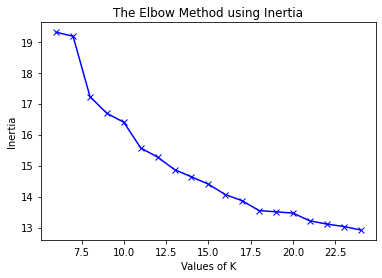

In [34]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [35]:
kmeanModel = TimeSeriesKMeans(n_clusters=20, metric="dtw", max_iter=10, random_state=seed)
kmeanModel.fit(ts_X)
labels = kmeanModel.predict(ts_X)

In [36]:
stock_clusters = pd.DataFrame(np.array([ticker_order,labels]).T, columns=['stock','cluster'])

## Read in Previous Work

In [6]:

stock_clusters = pd.read_csv(parentDirectory + '/data/stock_clusters.csv')
#stock_clusters = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/stock_clusters.csv', index_col=0)

In [7]:
sp_500_cluster  = pd.read_pickle(parentDirectory + '/data/SP500_list_clustered.pkl')
#sp_500_cluster = pd.read_pickle('/gdrive/MyDrive/Colab Notebooks/SP500_list_clustered.pkl')

ValueError: ignored

In [12]:
ts_X.shape

(497, 119, 19)

In [15]:
ts_X[0].shape

(119, 19)

# Pairwise Dynamic Time Warp path
### This gives us a dissimilarity rating

In [16]:
pairwise = np.empty((497, 497))
for i, x in enumerate(ts_X):
    for j, x_prime in enumerate(ts_X):
        pairwise[i, j] = dtw_path(x,x_prime)[1]

In [18]:
df_pairwise = pd.DataFrame(pairwise, columns=ticker_order , index = ticker_order)

# Output Files

In [21]:
df_pairwise.to_csv('/gdrive/MyDrive/Colab Notebooks/pairwise_dtw.csv')

In [18]:
df_pairwise = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/pairwise_dtw.csv', index_col=0)

In [9]:
stock_clusters.cluster.unique()

array([ 2,  4,  1,  8,  0, 12, 19, 16, 11, 15, 13,  6, 14, 18,  5, 10,  7,
        9, 17,  3])

In [10]:
stock_clusters

,stock,cluster
0,KR,2
1,AZO,2
2,COST,2
3,GS,4
4,BBY,1
...,...,...
492,MRNA,14
493,CARR,4
494,CTVA,15
495,OGN,15


In [19]:
cl_list_dict ={}
for i, c in enumerate(stock_clusters.cluster.unique()):
  cl_list_dict[i] = stock_clusters[stock_clusters.cluster == c]['stock'].to_list()


In [20]:
df_pairwise

,KR,AZO,COST,GS,BBY,CAG,DRI,GIS,GPN,KMX,CCL,CTAS,FDX,LEN,MKC,MS,NKE,ORCL,PAYX,STZ,WBA,MU,ADBE,PEP,YUM,HST,MAR,CMI,HOLX,HSIC,LRCX,PNR,QCOM,TAP,TFX,ABC,ABMD,ABT,ADM,ADP,...,ZTS,NWSA,APTV,ALLE,FANG,HLT,IQV,TWTR,ANET,CTLT,KEYS,AAL,STE,HPE,CFG,CZR,ETSY,FTV,INFO,PAYC,PYPL,SYF,QRVO,LW,WRK,DXC,BKR,IR,KHC,CDAY,DOW,AMCR,FOXA,EVRG,LIN,MRNA,CARR,CTVA,OGN,OTIS
KR,0.000000,6.447632,4.845033,9.818200,11.276145,10.678035,9.523721,10.051929,10.730909,11.810350,9.395312,11.234572,11.792155,11.521500,11.099001,9.757708,10.868736,11.091463,10.331827,10.128445,10.746262,10.706381,11.294796,11.672164,11.623519,8.817986,7.547347,9.974719,9.703520,11.924540,11.092617,11.477874,6.405690,10.626259,10.405600,11.207672,8.020196,10.130947,10.894039,5.664853,...,5.516567,9.655217,6.486911,11.398976,7.608660,7.858648,10.204688,10.541636,7.825735,8.397894,7.416337,9.333769,10.937582,10.448813,10.135071,8.655715,11.033232,11.554616,7.835762,5.402853,9.219011,11.629461,9.678178,10.551223,10.790828,10.388009,8.618536,5.271459,10.745564,4.987465,10.980802,11.135913,8.440897,7.805664,9.116567,7.887677,10.118342,11.430714,9.969599,11.579122
AZO,6.447632,0.000000,4.685672,10.004185,11.328834,10.737479,9.519254,9.864978,10.656941,11.826753,9.801145,10.962381,11.703120,12.173424,11.297792,10.226088,10.954662,10.965050,9.575313,10.344845,10.610648,11.003069,11.489702,11.480450,11.940720,8.569416,7.051872,8.907430,10.081675,11.463635,11.067586,11.807328,6.884483,10.292275,10.400558,11.601780,7.843066,10.053837,10.792482,4.800095,...,4.712320,8.922270,5.784290,11.873295,8.555720,7.416093,10.101436,10.170678,7.694806,8.233797,7.814657,9.131775,10.853625,9.936594,9.279317,9.096530,10.784274,11.728477,7.362625,4.735974,9.061651,11.237266,10.142821,10.425417,10.882191,10.360331,8.429173,5.061951,10.159057,4.243123,10.888540,11.263692,8.728235,8.444142,9.524760,8.084095,10.581772,11.045679,9.885590,12.639877
COST,4.845033,4.685672,0.000000,9.546081,11.199140,10.791117,9.519730,9.443987,10.248014,11.572410,9.670290,10.503306,11.590703,11.615342,10.811006,9.649900,10.171416,10.674964,9.474259,9.538215,10.887315,10.521113,11.077738,11.136116,11.677573,9.047653,6.634282,9.922448,9.102409,11.585110,11.277090,11.359205,6.560348,10.794865,10.533494,11.083553,7.270385,9.773684,9.981239,4.309567,...,3.569976,9.707601,5.954846,11.416926,6.575336,7.243527,9.880271,10.292088,7.165470,7.429828,7.173311,9.781655,10.364736,10.398473,9.531629,7.958091,10.410471,11.452211,6.880965,3.093858,9.204369,11.527392,10.121812,11.557816,10.525945,10.927941,7.950014,4.168786,11.439385,2.598085,10.671312,10.961869,8.119797,8.489046,9.049279,7.283145,9.767341,11.289568,9.122581,11.527874
GS,9.818200,10.004185,9.546081,0.000000,8.025325,9.923392,10.700429,10.186773,8.135858,9.602734,7.264901,8.194258,8.642957,8.969528,8.178129,4.255036,11.388883,8.252084,9.985261,8.194172,7.639065,8.059791,8.755010,8.648149,8.219652,10.047488,8.738499,8.213526,10.501612,9.653058,10.723921,8.332402,9.693354,7.641659,10.575407,8.678172,12.878351,11.238785,8.608949,8.794230,...,10.707676,11.573160,10.688934,8.543457,8.118264,7.514545,10.807039,11.008217,7.047468,8.372303,8.508339,10.848935,8.166804,6.519001,10.492692,8.458154,7.928122,8.337265,7.548501,10.472485,12.716819,8.910183,9.377302,12.207431,8.092195,9.035058,10.518834,9.754192,10.847239,9.543255,7.972008,8.947711,6.093672,7.804663,9.518322,8.174540,5.738020,8.291774,9.211006,9.278819
BBY,11.276145,11.328834,11.199140,8.025325,0.000000,6.662402,8.428556,7.692146,4.970129,6.568702,8.000263,4.890382,4.403235,5.411748,4.290208,8.503396,9.138788,4.937860,7.586177,5.174597,6.888045,4.800965,5.362770,5.052270,5.141106,10.460887,9.917469,8.352007,8.619900,7.003289,8.048259,4.755429,10.725944,7.206833,7.884401,5.532379,10.943728,8.863142,5.547881,10.300654,...,12.952666,9.555591,11.904973,5.185791,6.521887,9.231034,7.636409,9.457989,6.769117,10.914551,10.721157,8.366953,4.693785,7.358492,8.609423,6.119944,4.323445,4.414042,9.925693,12.615985,10.737503,6.043000,9.988874,10.3

## Visually Explore Clustering

In [12]:
!pip install plotly==4.8.0 
import plotly.express as px

In [21]:
fig = px.imshow(df_pairwise.loc[cl_list_dict[0],cl_list_dict[0]], x=cl_list_dict[0], y=cl_list_dict[0])
fig.show()

In [22]:
fig = px.imshow(df_pairwise.loc[cl_list_dict[1],cl_list_dict[1]], x=cl_list_dict[1], y=cl_list_dict[1])
fig.show()

In [24]:
fig = px.imshow(df_pairwise.loc[cl_list_dict[2],cl_list_dict[2]], x=cl_list_dict[2], y=cl_list_dict[2])
fig.show()

In [30]:
fig = px.imshow(df_pairwise.loc[cl_list_dict[8],cl_list_dict[8]], x=cl_list_dict[8], y=cl_list_dict[8])
fig.show()

In [29]:
fig = px.imshow(df_pairwise.loc[cl_list_dict[17],cl_list_dict[17]], x=cl_list_dict[17], y=cl_list_dict[17])
fig.show()

In [28]:
fig = px.imshow(df_pairwise.loc[cl_list_dict[18],cl_list_dict[18]], x=cl_list_dict[18], y=cl_list_dict[18])
fig.show()

In [27]:
fig = px.imshow(df_pairwise.loc[cl_list_dict[19],cl_list_dict[19]], x=cl_list_dict[19], y=cl_list_dict[19])
fig.show()